In [6]:
# Install the Prophet
!pip install prophet

In [7]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet

In [8]:
import warnings
# Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [9]:
# Set crypto variable
crypto = 'TRX'

# Create crypto df
crypto_df = f'{crypto}_df'.lower()

In [10]:
# Store the crypto data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.
crypto_df = pd.read_csv(
    f'~/crypto-forecast/Resources/{crypto}-USD.csv',
    index_col='Date',
    parse_dates=True
).dropna()

# Sort by ascending date
crypto_df = crypto_df.sort_values(by="Date", ascending=True)

# Review the first and last five rows of the DataFrame
display(crypto_df.head())
display(crypto_df.tail())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.002304,0.002438,0.002285,0.002344,0.002344,2924350
2017-11-10,0.002335,0.002350,0.001989,0.002013,0.002013,2193620
2017-11-11,0.002026,0.002298,0.001890,0.002003,0.002003,1748460
2017-11-12,0.002006,0.002006,0.001684,0.001783,0.001783,2174370
2017-11-13,0.001795,0.002146,0.001771,0.002112,0.002112,2889150


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-28,0.112466,0.112499,0.110371,0.111102,0.111102,329425570
2024-05-29,0.111102,0.112357,0.110973,0.111948,0.111948,276957864
2024-05-30,0.111948,0.112162,0.110736,0.112013,0.112013,262083184
2024-05-31,0.112013,0.112453,0.111120,0.112073,0.112073,272401228
2024-06-01,0.112073,0.112811,0.111007,0.112478,0.112478,194791817


In [11]:
# Get last closing price
last_close_df = crypto_df.iloc[-1]
last_close_price = last_close_df['Close']
last_close_price

0.112478

In [12]:
crypto_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993291,0.993656,0.992118,0.992118,0.191680
High,0.993291,1.000000,0.986174,0.995354,0.995354,0.234098
Low,0.993656,0.986174,1.000000,0.993804,0.993804,0.160281
Close,0.992118,0.995354,0.993804,1.000000,1.000000,0.203654
Adj Close,0.992118,0.995354,0.993804,1.000000,1.000000,0.203654
Volume,0.191680,0.234098,0.160281,0.203654,0.203654,1.000000


In [13]:
# Create new df with just Close prices and Volume
df_close = crypto_df[['Close', 'Volume']]

In [14]:
df_close.name = 'Close'
df_close

,Close,Volume
Date,,
2017-11-09,0.002344,2924350
2017-11-10,0.002013,2193620
2017-11-11,0.002003,1748460
2017-11-12,0.001783,2174370
2017-11-13,0.002112,2889150
...,...,...
2024-05-28,0.111102,329425570
2024-05-29,0.111948,276957864
2024-05-30,0.112013,262083184


In [15]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
df_close_ma = df_close.copy()

# Calculate 10-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA10'] = df_close_ma['Close'].rolling(10).mean()

# Calculate 30-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA30'] = df_close_ma['Close'].rolling(30).mean()

# Calculate 50-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA50'] = df_close_ma['Close'].rolling(50).mean()

# Remove NULL values
df_close_ma.dropna(inplace=True)

In [16]:
# Review the first and last five rows of the DataFrame
display(df_close_ma.head())
display(df_close_ma.tail())

,Close,Volume,SMA10,SMA30,SMA50
Date,,,,,
2017-12-28,0.041974,261940992,0.042059,0.021286,0.013622
2017-12-29,0.036348,246896992,0.041009,0.022428,0.014302
2017-12-30,0.036413,256698000,0.039762,0.023567,0.014990
2017-12-31,0.044752,375152000,0.039640,0.024988,0.015845
2018-01-01,0.051695,516798016,0.040902,0.026642,0.016844


,Close,Volume,SMA10,SMA30,SMA50
Date,,,,,
2024-05-28,0.111102,329425570,0.117050,0.121241,0.118554
2024-05-29,0.111948,276957864,0.116125,0.121005,0.118372
2024-05-30,0.112013,262083184,0.114882,0.120756,0.118228
2024-05-31,0.112073,272401228,0.113725,0.120481,0.118061
2024-06-01,0.112478,194791817,0.112963,0.120154,0.118013


<Axes: xlabel='Date'>

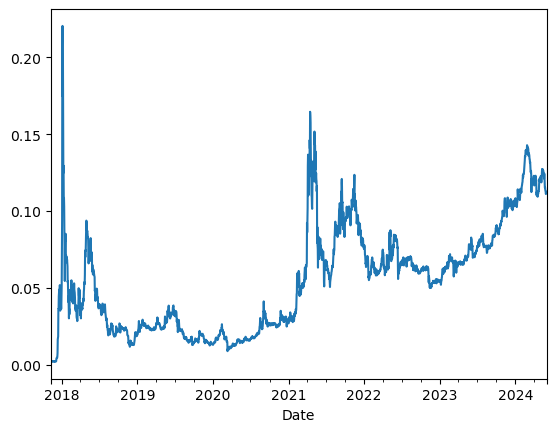

In [17]:
# Plot Close
df_close['Close'].plot()

In [18]:
## Create a Time Series Model with Prophet

In [19]:
# Using the DataFrame, reset the index so the date information is no longer the index
df_close = df_close.reset_index()

In [20]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df_close.rename(columns={'Date':'ds','Close':'y'}, inplace=True)

# Drop an NaN values from the prophet_df DataFrame
df_close.dropna()

# View the first and last five rows of the DataFrame
df_close

,ds,y,Volume
0,2017-11-09,0.002344,2924350
1,2017-11-10,0.002013,2193620
2,2017-11-11,0.002003,1748460
3,2017-11-12,0.001783,2174370
4,2017-11-13,0.002112,2889150
...,...,...,...
2392,2024-05-28,0.111102,329425570
2393,2024-05-29,0.111948,276957864
2394,2024-05-30,0.112013,262083184
2395,2024-05-31,0.112073,272401228


In [21]:
# Call the Prophet function, store as an object
crypto_model = Prophet()

In [22]:
# Fit the time-series model.
crypto_model.fit(df_close)

16:24:10 - cmdstanpy - INFO - Chain [1] start processing
16:24:10 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
# Create a future dataframe to hold predictions
# Make the prediction go out 30 days
crypto_future = crypto_model.make_future_dataframe(periods = 90, freq = 'd')

# View the last five rows of the DataFrame
crypto_future.tail(5)

,ds
2482,2024-08-26
2483,2024-08-27
2484,2024-08-28
2485,2024-08-29
2486,2024-08-30


In [28]:
# Make the predictions for the data using the DataFrame
crypto_forecast = crypto_model.predict(crypto_future)

# Display the first five rows of the DataFrame
crypto_forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2457,2024-08-01,0.134406,0.112000,0.149389,0.133245,0.135487,-0.004387,-0.004387,-0.004387,0.000044,0.000044,0.000044,-0.004430,-0.004430,-0.004430,0.0,0.0,0.0,0.130020
2458,2024-08-02,0.134547,0.112477,0.149895,0.133359,0.135663,-0.004367,-0.004367,-0.004367,0.000082,0.000082,0.000082,-0.004449,-0.004449,-0.004449,0.0,0.0,0.0,0.130179
2459,2024-08-03,0.134687,0.111426,0.150444,0.133444,0.135843,-0.004232,-0.004232,-0.004232,0.000222,0.000222,0.000222,-0.004454,-0.004454,-0.004454,0.0,0.0,0.0,0.130456
2460,2024-08-04,0.134828,0.112096,0.149173,0.133559,0.136021,-0.004211,-0.004211,-0.004211,0.000233,0.000233,0.000233,-0.004444,-0.004444,-0.004444,0.0,0.0,0.0,0.130617
2461,2024-08-05,0.134969,0.111764,0.150011,0.133658,0.136206,-0.004588,-0.004588,-0.004588,-0.000168,-0.000168,-0.000168,-0.004420,-0.004420,-0.004420,0.0,0.0,0.0,0.130380
2462,2024-08-06,0.135109,0.111554,0.148293,0.133753,0.136388,-0.004673,-0.004673,-0.004673,-0.000289,-0.000289,-0.000289,-0.004383,-0.004383,-0.004383,0.0,0.0,0.0,0.130437
2463,2024-08-07,0.135250,0.111167,0.149634,0.133839,0.136612,-0.004457,-0.004457,-0.004457,-0.000122,-0.000122,-0.000122,-0.004334,-0.004334,-0.004334,0.0,0.0,0.0,0.130793
2464,2024-08-08,0.135390,0.110658,0.150040,0.133937,0.136813,-0.004231,-0.004231,-0.004231,0.000044,0.000044,0.000044,-0.004274,-0.004274,-0.004274,0.0,0.0,0.0,0.131159
2465,2024-08-09,0.135531,0.112632,0.149730,0.134005,0.136981,-0.004124,-0.004124,-0.004124,0.000082,0.000082,0.000082,-0.004205,-0.004205,-0.004205,0.0,0.0,0.0,0.131407
2466,2024-08-10,0.135672,0.113481,0.150060,0.134098,0.137150,-0.003906,-0.003906,-0.003906,0.000222,0.000222,0.000222,-0.004128,-0.004128,-0.004128,0.0,0.0,0.0,0.131765


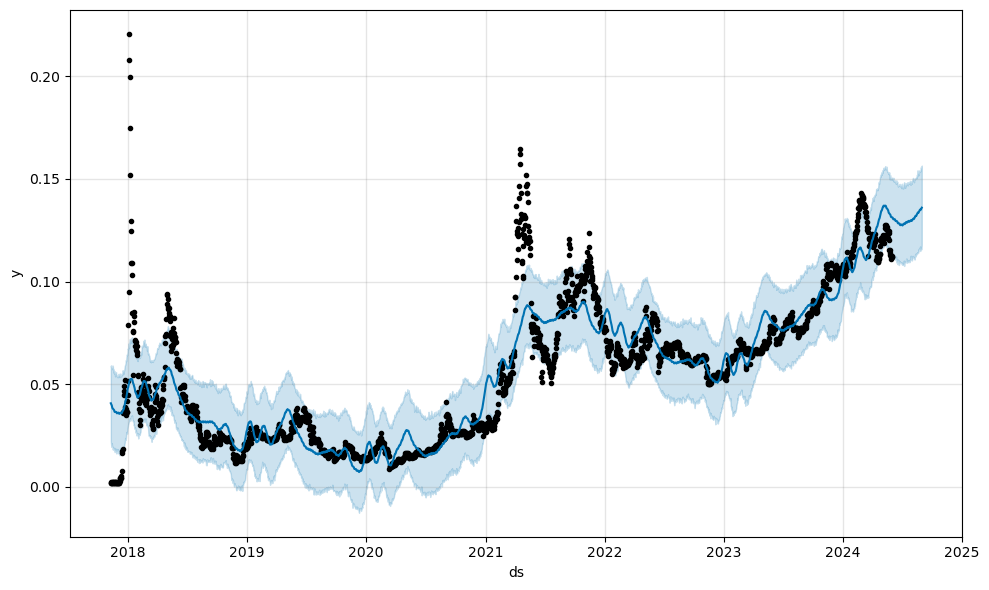

In [29]:
# Plot the Prophet predictions for the data
fig_forecast = crypto_model.plot(crypto_forecast)

In [30]:
# Set the index in the forecast DataFrame to the ds datetime column
crypto_forecast = crypto_forecast.set_index('ds')

In [31]:
# View only the yhat,yhat_lower and yhat_upper columns from the forecast DataFrame
crypto_forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-90:,:]

,yhat,yhat_lower,yhat_upper
ds,,,
2024-06-02,0.131048,0.112076,0.149727
2024-06-03,0.130518,0.112282,0.149233
2024-06-04,0.130275,0.112582,0.150500
2024-06-05,0.130326,0.111529,0.148626
2024-06-06,0.130377,0.112937,0.148887
...,...,...,...
2024-08-26,0.134874,0.115012,0.153801
2024-08-27,0.134956,0.116429,0.155665
2024-08-28,0.135329,0.115628,0.154798


In [32]:
# Rename columns
crypto_forecast.rename(columns={'yhat':'mid trend price','yhat_lower':'lower trend price','yhat_upper':'upper trend price'}, inplace=True)

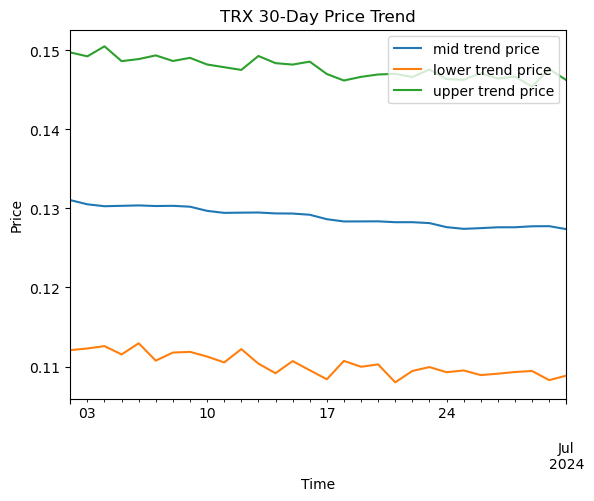

In [33]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:-60,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 30-Day Price Trend')    
plt.show()

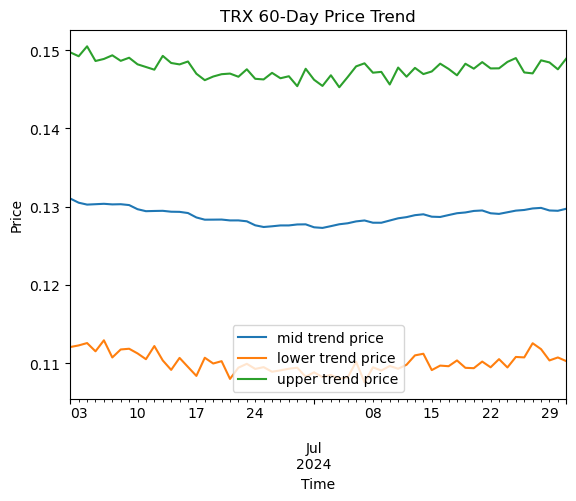

In [34]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:-30,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 60-Day Price Trend')    
plt.show()

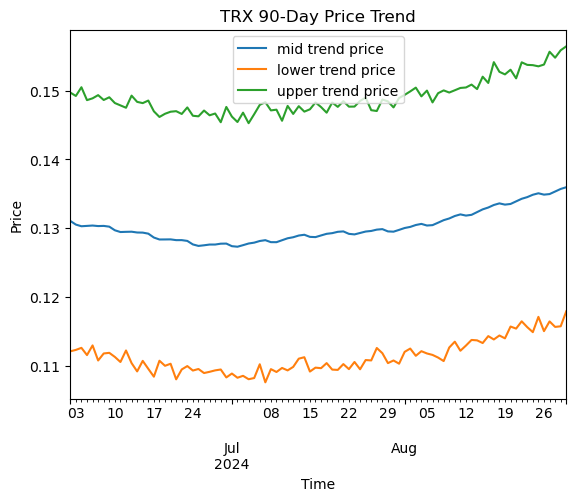

In [36]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 90-Day Price Trend')    
plt.savefig(f'{crypto}_90d_trend_forecast', bbox_inches = 'tight')
plt.show()

In [37]:
# Retrieve last closing price
last_close_price

0.112478

In [38]:
# Retreive tomorrow's mid trend price forecast
tommorow_mid_trend_price = crypto_forecast['mid trend price'].iloc[-90]
tommorow_mid_trend_price

0.13104817209928357

In [39]:
# Calculate tommorrow's weighted price
wp = last_close_price*.5 + tommorow_mid_trend_price*.5
wp

0.12176308604964178

In [40]:
# Retreive tomorrow's weighted trend price forecast
tommorow_mid_trend_price = ((crypto_forecast['mid trend price'].iloc[-90]*.6)+(crypto_forecast['upper trend price'].iloc[-90]*.2)+(crypto_forecast['lower trend price'].iloc[-90]*.2))
tommorow_mid_trend_price

0.1309895437220245

In [41]:
# Retrieve weighted trend price in 30 days
mid_trend_price_in_30 = ((crypto_forecast['mid trend price'].iloc[-60]*.6)+(crypto_forecast['upper trend price'].iloc[-60]*.2)+(crypto_forecast['lower trend price'].iloc[-60]*.2))
mid_trend_price_in_30

0.12711222708463252

In [42]:
# Retrieve weighted trend price in 60 days
mid_trend_price_in_60 = ((crypto_forecast['mid trend price'].iloc[-30]*.6)+(crypto_forecast['upper trend price'].iloc[-30]*.2)+(crypto_forecast['lower trend price'].iloc[-30]*.2))
mid_trend_price_in_60

0.1302897020308355

In [43]:
# Retrieve weighted trend price in 90 days
mid_trend_price_in_90 = ((crypto_forecast['mid trend price'].iloc[-1]*.6)+(crypto_forecast['upper trend price'].iloc[-1]*.2)+(crypto_forecast['lower trend price'].iloc[-1]*.2))
mid_trend_price_in_90

0.13644172361655005

In [44]:
# Calculate expected gain/loss between mid trend price in 30 days and last close price
#percent_diff_30 = ((mid_trend_price_in_30)/(last_close_price))-1
percent_diff_30 = ((mid_trend_price_in_30)/(wp))-1
percent_diff_30.round(3)

0.044

In [45]:
# Calculate expected gain/loss between mid trend price in 60 days and last close price
#percent_diff_60 = ((mid_trend_price_in_60)/(last_close_price))-1
percent_diff_60 = ((mid_trend_price_in_60)/(wp))-1
percent_diff_60.round(3)

0.07

In [46]:
# Calculate expected gain/loss between mid trend price in 90 days and last close price
#percent_diff_90 = ((mid_trend_price_in_90)/(last_close_price))-1
percent_diff_90 = ((mid_trend_price_in_90)/(wp))-1
percent_diff_90.round(3)

0.121

In [47]:
# Reset the index in the forecast DataFrame
crypto_forecast = crypto_forecast.reset_index()

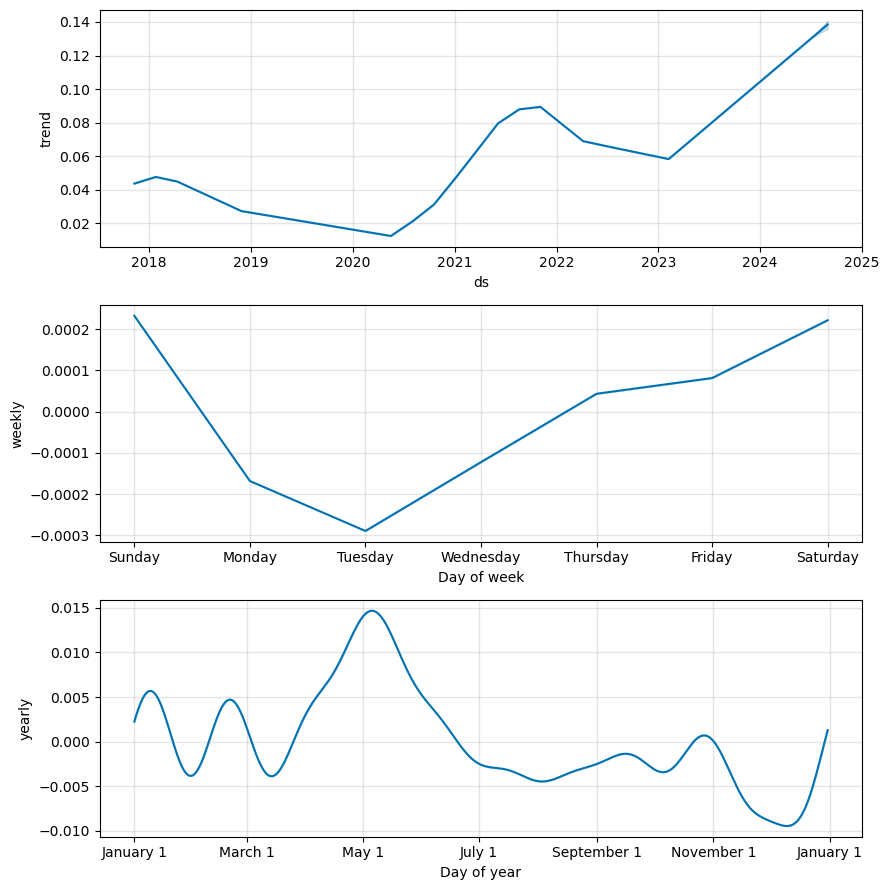

In [54]:
# Use the plot_components function to visualize the forecast results
# for the forecast DataFrame
fig_comp = crypto_model.plot_components(crypto_forecast)
plt.savefig(f'{crypto}_components.png', bbox_inches = 'tight')

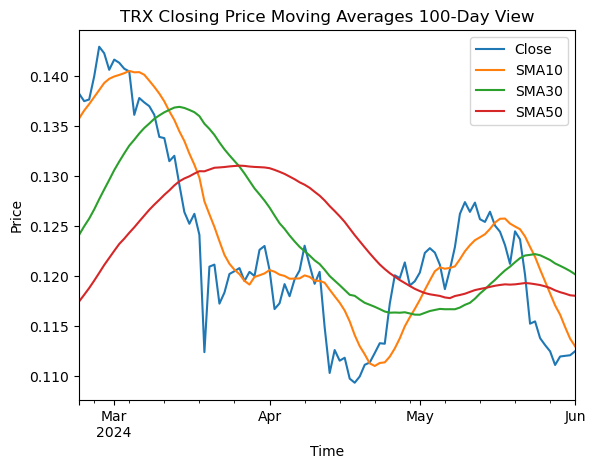

In [49]:
df_last_100 = df_close_ma.iloc[-100:]
df_last_100[['Close', 'SMA10', 'SMA30', 'SMA50']].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} Closing Price Moving Averages 100-Day View')    
plt.show()

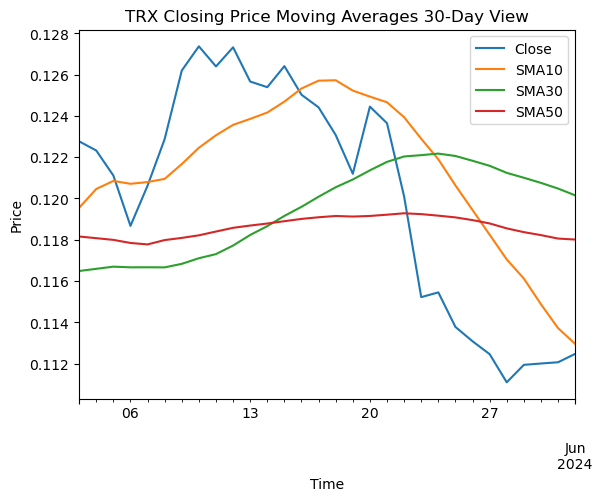

In [55]:
df_last_100 = df_close_ma.iloc[-30:]
df_last_100[['Close', 'SMA10', 'SMA30', 'SMA50']].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} Closing Price Moving Averages 30-Day View')    
plt.savefig(f'{crypto}_30d_MA_view.png', bbox_inches = 'tight')
plt.show()

In [51]:
# import module
from datetime import datetime
 
# get current date and time
current_datetime = datetime.now().strftime("%Y-%m-%d")
print("Current date & time : ", current_datetime)
 
# convert datetime obj to string
str_current_datetime = str(current_datetime)
 
# create a file object along with extension
#file_name = f'{crypto} '+str_current_datetime+".txt"
file_name = str_current_datetime+".csv"
file = open(file_name, 'a')
 
print("File created : ", file.name)
file.close()

Current date & time :  2024-06-02
File created :  2024-06-02.csv


In [52]:
f = open(f'{file_name}', "a")
f.writelines([f'{crypto},{last_close_price},{percent_diff_30},{percent_diff_60},{percent_diff_90}\n'])
f.close()

In [53]:
f = open(f'{file_name}', "r")
print(f.read())

ADA,0.449975,-0.10901631551481594,-0.11092059991991376,0.3509869614670582
ATOM,8.324,-0.33991694590791044,-0.3714581211536879,-0.1364866156068958
AVAX,35.76,-0.18209253217532206,-0.11091103505461575,0.08171603105696135
BNB,601.3,-0.23364934433493878,-0.1940545909823247,-0.15012398429900753
BONK,3.3e-05,0.0869994207211342,0.214013556994614,0.32649958564761183
BTC,67706.94,-0.11245843916078024,-0.06653480305698356,-0.05114734665447629
DOGE,0.1602,-0.22746720928706532,-0.2069470666925296,-0.08220738687268558
ETH,3813.2,-0.14210837945909027,-0.07466875734312517,-0.04156040932743599
PEPE,1.5e-05,0.10018396725609113,0.2973887016051089,0.48986599086615756
SHIB,2.5e-05,-0.02223985209917234,0.000567920808088429,0.016601454860916798
SOL,166.03,0.08268635494333143,0.16519430794776246,0.2856162325196754
TRX,0.112478,0.047611408863998284,0.06586311567622971,0.11520707579434442
TURBO,0.006987,-0.2950330177445859,-0.14810273834767862,0.023692560414227293
WIF,3.2756,-0.027545615271177937,-0.0076651111